In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
import community
from operator import itemgetter
init_notebook_mode(connected=True)

helpful link: http://programminghistorian.github.io/ph-submissions/lessons/published/exploring-and-analyzing-network-data-with-python

In [2]:
with open('/Users/danaiavg/Desktop/marvel-comic-social-network/data/weighted_edge_top_1000.csv', 'r') as nodecsv: # Open the file                       
    nodereader = csv.reader(nodecsv) # Read the csv  
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader] 

In [3]:
nodes = nodes[1:]

In [4]:
for row in nodes:
    del row[0]

In [5]:
node1 = [n[0] for n in nodes]
node2 = [n[1] for n in nodes]
node1.extend(node2)
my_nodes = list(set(node1))
my_nodes.sort()

In [6]:
G=nx.Graph()

In [7]:
my_edges=nodes
for row in my_edges:
    del row[2]

In [8]:
G.add_nodes_from(my_nodes)
G.add_edges_from(my_edges)

In [9]:
print(nx.is_connected(G))

True


In [10]:
from community import community_louvain
communities = community_louvain.best_partition(G)

In [11]:
nx.set_node_attributes(G, 'modularity', communities)

In [12]:
values = [communities.get(node) for node in G.nodes()]

values1 = []
for i in values:
    if i == 0:
        values1.append('blue')
    elif i ==1:
        values1.append('red')
    elif i ==2:
        values1.append('green')
    elif i ==3:
        values1.append('yellow')
    elif i ==4:
        values1.append('cyan')
    elif i ==5:
        values1.append('magenta')

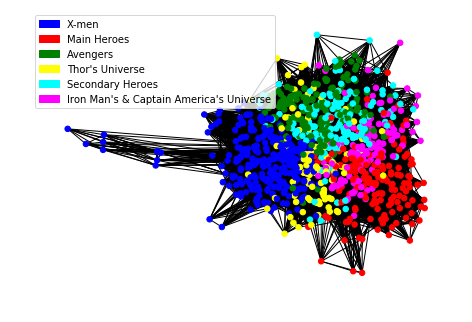

In [16]:
import matplotlib.patches as mpatches

nx.draw_spring(G, node_color = values1, node_size=30, with_labels=False)
plt.legend(handles=[mpatches.Patch(color='blue', label='X-men'), 
                    mpatches.Patch(color='red', label='Main Heroes'), 
                    mpatches.Patch(color='green', label='Avengers'),
                    mpatches.Patch(color='yellow', label="Thor's Universe"),
                    mpatches.Patch(color='cyan', label='Secondary Heroes'),
                    mpatches.Patch(color='magenta', label="Iron Man's & Captain America's Universe")
                   ])

plt.savefig("/Users/danaiavg/Downloads/shit.png", format="PNG")

In [14]:
# Iron Man/ Captain America Universe
print(communities['IRON MAN/TONY STARK'])
print(communities['CAPTAIN AMERICA'])
print(communities['PATRIOT/JEFF MACE'])

5
5
5


In [15]:
# Avenger
print(communities['SCARLET WITCH/WANDA'])
print(communities['BLACK WIDOW/NATASHA'])
print(communities['HULK/DR. ROBERT BRUC'])
print(communities['SHE-HULK/JENNIFER WA'])
print(communities['ANT-MAN/DR. HENRY J.'])
print(communities['VISION'])
print(communities['THING/BENJAMIN J. GR'])
print(communities['INVISIBLE WOMAN/SUE'])

2
2
2
2
2
2
2
2


In [17]:
# Xmen
print(communities['WOLVERINE/LOGAN'])
print(communities['STORM/ORORO MUNROE S'])
print(communities['CYCLOPS/SCOTT SUMMER'])
print(communities['PROFESSOR X/CHARLES'])
print(communities['DEADPOOL/JACK/WADE W'])
print(communities['ROGUE /'])
print(communities['BEAST/HENRY &HANK& P'])

0
0
0
0
0
0
0


In [18]:
# Main Heroes
print(communities['DAREDEVIL/MATT MURDO'])
print(communities['SPIDER-MAN/PETER PAR'])
print(communities['MR. FANTASTIC/REED R'])
print(communities['HUMAN TORCH/JOHNNY S'])

1
1
1
1


In [ ]:
# [k for k,v in communities.items() if v ==5]